<a href="https://colab.research.google.com/github/KFurudate/Midoribon/blob/main/chap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 マルコフ連鎖モンテカルロ(MCMC)法とベイズ統計モデル


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.special import comb
from scipy import stats
%matplotlib inline

In [3]:
data_dir = "/content/drive/My Drive/Midoribon/input/"
data =  pd.read_csv(os.path.join(data_dir, 'chap8_data.csv'))

In [4]:
print(len(data))
data

20


,y,N
0,4,8
1,3,8
2,4,8
3,5,8
4,5,8
5,2,8
6,3,8
7,1,8
8,4,8
9,0,8


In [5]:
data.describe()

,y,N
count,20.000000,20.0
mean,3.650000,8.0
std,1.598519,0.0
min,0.000000,8.0
25%,3.000000,8.0
50%,4.000000,8.0
75%,5.000000,8.0
max,6.000000,8.0


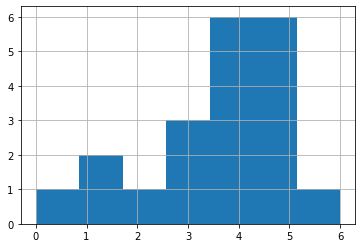

In [6]:
data.y.hist(bins=data.y.max()+1)
plt.show()

生存種子数$y_i$が二項分布に従うと仮定する
$$
p(y_i | q) = \binom{8}{y_i} q^{y_i} (1-q)^{8-y_i}
$$

尤度$L(q)$は、「データが得られる確率」の積
$$
L(q) = p({\bf{Y}}|q) = \prod_i p(y_i|q)
$$
両辺の対数を取ると、
$$
\log L(q) = \sum_i \{ y_i \log q +(8-y_i) log(1-q)\} + \bf{const}
$$

### ロジスティック回帰とロジットリンク関数

GLMは、確率分布・リンク関数・線形予測子を指定し、足し算の数式であらわされるモデル（線形モデル）。
ロジスティック回帰は、二項分布(確率分布)、ロジットリンク関数(リンク関数)を用いる。

$$
q_i = logistic (z_i) = \frac{1} {1+\exp(-z_i)}
$$

ziは、線形予測子で、 $z_i = \beta_1 + \beta_2 x_i + ...$

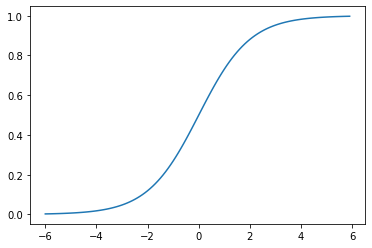

In [7]:
def sigmoid(zi):
    return 1 /(1+np.exp(-zi))

zi = np.arange(-6, 6, 0.1)
qi = sigmoid(zi)

plt.plot(zi, qi)
ｐｌｔ.show()

ロジット関数は、ロジスティック関数の逆関数である。

$$
logit(q_i)=\log \frac {q_i}{1-q_i}
$$

In [8]:
# # 二項分布に従うと仮定して、y=β1の線形予測子とロジットリンク関数でモデルを作成
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm('y + I(N-y)~ 1', data=data, family=sm.families.Binomial())
result = model.fit()
result.summary2()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM               AIC:            77.4957 
Link Function:      logit             BIC:            -28.1970
Dependent Variable: ['y', 'I(N - y)'] Log-Likelihood: -37.748 
Date:               2020-10-04 22:29  LL-Null:        -37.748 
No. Observations:   20                Deviance:       28.722  
Df Model:           0                 Pearson chi2:   24.5    
Df Residuals:       19                Scale:          1.0000  
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept   -0.1754    0.1587  -1.1054  0.2690  -0.4865  0.1356
==============================================================

"""

In [9]:
β1 = -0.1754	

In [10]:
#生存確率（データYのもとでの最尤推定値）
p = sigmoid(β1)
p

0.45626207623047454

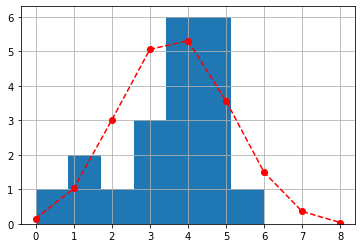

In [11]:
x = range(9)
binomial = stats.binom.pmf(x, 8, p)*20
plt.plot(x, binomial, "ro--")

data.y.hist(bins=data.y.max()+1)
plt.show()

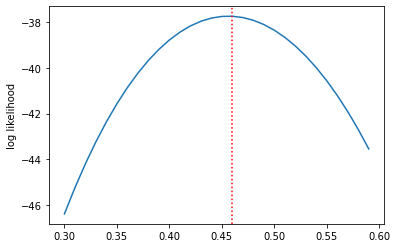

生存率 q: 0.46　で対数尤度が最大（最尤推定値）


In [13]:
Q = np.arange(0.3, 0.6, 0.01)
logL = []
for q in Q:
  logL.append(sum([stats.binom.logpmf(i, 8, q) for i in data.y]))
logL = np.array(logL)
plt.plot(Q, logL)
plt.axvline(Q[logL.argmax()], color='red', linestyle='dotted')

plt.ylabel("log likelihood")
plt.show()
print(f"生存率 q: {round(Q[logL.argmax()], 2)}　で対数尤度が最大（最尤推定値）")

 ### ふらふら試行錯誤による最尤推定

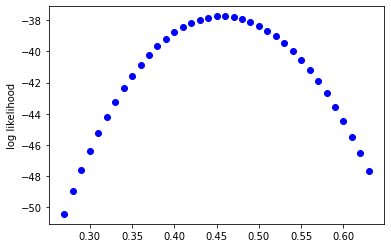

In [14]:
Q = np.arange(0.27, 0.64, 0.01)
logL = []
for q in Q:
  logL.append(sum([stats.binom.logpmf(i, 8, q) for i in data.y]))
logL = np.array(logL)
plt.plot(Q, logL, "bo")

plt.ylabel("log likelihood")
plt.show()

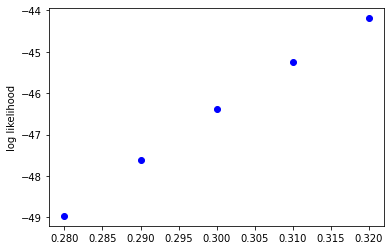

In [15]:
Q = np.arange(0.28, 0.33, 0.01)
logL = []
for q in Q:
  logL.append(sum([stats.binom.logpmf(i, 8, q) for i in data.y]))
logL = np.array(logL)
plt.plot(Q, logL, "bo")

plt.ylabel("log likelihood")
plt.show()

In [16]:
def loglikelihood(data, q):
    L = 0
    for i, r in data.iterrows():
        L += math.log(comb(r['N'], r['y'])) + r['y']*math.log(q) + (r['N'] - r['y'])*math.log(1-q)
    return L


In [17]:
def maximum_likelihood_estimation(data, theta, number_of_trials):
    theta_current = theta
    L_current = loglikelihood(data, theta_current)
    
    q, L = [theta_current], [L_current]
    for r in np.random.random(number_of_trials):
        theta_new = theta_current + 0.01 if r > 0.5 else theta_current - 0.01
        L_new = loglikelihood(data, theta_new)
        
        if L_current < L_new:
            theta_current, L_current = theta_new,  L_new
        q.append(theta_current)
        L.append(L_current)
    return q, L


In [18]:
q_06, l_06 = maximum_likelihood_estimation(data, 0.6, 100)
q_03, l_03 = maximum_likelihood_estimation(data, 0.3, 100)

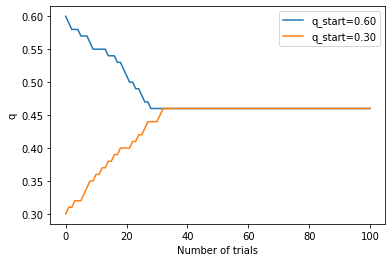

In [19]:
plt.plot(np.arange(len(q_06)), q_06, label='q_start=0.60')
plt.plot(np.arange(len(q_03)), q_03, label='q_start=0.30')
plt.legend()
plt.xlabel('Number of trials')
plt.ylabel('q')
plt.show()

### MCMCアルゴリズムのひとつ：メトロポリス

サンプリングが簡単な遷移核 を提案分布q(θ'|θ)すで置き換え、詳細つり合いを満たすように補正する。

提案分布を使うと、詳細つり合いが満たされないときがある。

q(θ'|θ)f(θ) > q(θ|θ')f(θ')　

そこで、詳細つり合いを満たすように、補正係数rを導入する

rq(θ'|θ)f(θ) = q(θ|θ')f(θ')

rについて解けば、
r = q(θ|θ')f(θ') / q(θ'|θ)f(θ) 

1.  初期値θを適当に決める
2.  提案分布q(θ'|θ)から乱数を引いて、新しいθ'を探してくる
3.  次の条件式を判定する　q(θ'|θ)f(θ) > q(θ|θ')f(θ')
4.  真の場合、θからθ’の流れが強い。ｒを使って確率的に補正。
偽の場合、θからθ’の流れが弱い。θ'を受け入れる
5. 2-4を繰り返す

MCMCでは、すぐに定常分布になるわけではない。MCMCの定常分布に落ち着くまでの期間をバーンインまたはウォームアップという。

In [20]:
def mcmc_metropolis(data, theta, number_of_trials):
    theta_current = theta
    L_current = loglikelihood(data, theta_current)
    
    q, L = [theta_current], [L_current]
    for r in np.random.random(number_of_trials):
        r2 = np.random.random()
        theta_new = theta_current + 0.01 if r > 0.5 else theta_current - 0.01
        if theta_new <= 0.01:
            theta_new = 0.02
        elif theta_new >= 0.99:
            theta_new = 0.98
        L_new = loglikelihood(data, theta_new)
        
        if L_current < L_new or (math.exp(L_new - L_current) > r2):
            theta_current, L_current = theta_new,  L_new
        q.append(theta_current)
        L.append(L_current)
    return q, L

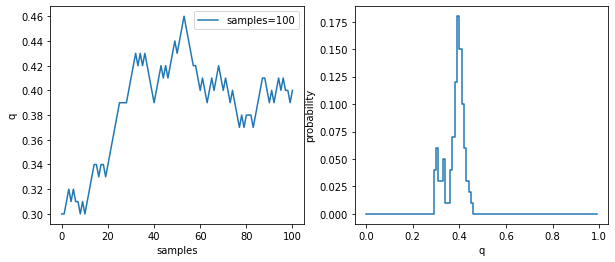

In [21]:
# モンテカルロステップ数 100
q_100, ｌ_100 = mcmc_metropolis(data, 0.3, 100)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(np.arange(len(q_100)), q_100, label='samples=100')
ax1.legend()
ax1.set_xlabel('samples')
ax1.set_ylabel('q')

count, value = np.histogram(q_100, bins=100, range=(0.00, 1.00))
ax2.step(value[:-1], count/100)
ax2.set_xlabel('q')
ax2.set_ylabel('probability')

plt.show()

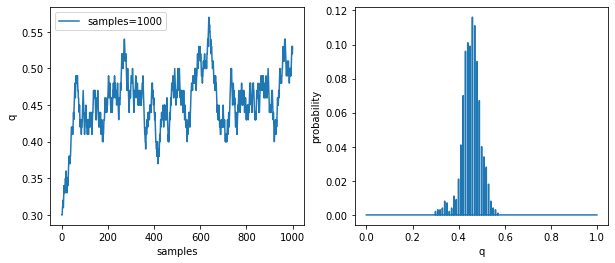

In [22]:
# モンテカルロステップ数 1000
q_1000, ｌ_1000 = mcmc_metropolis(data, 0.3, 1000)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(np.arange(len(q_1000)), q_1000, label='samples=1000')
ax1.legend()
ax1.set_xlabel('samples')
ax1.set_ylabel('q')

count, value = np.histogram(q_1000, bins=1000, range=(0.00, 1.00))
ax2.step(value[:-1], count/1000)
ax2.set_xlabel('q')
ax2.set_ylabel('probability')

plt.show()

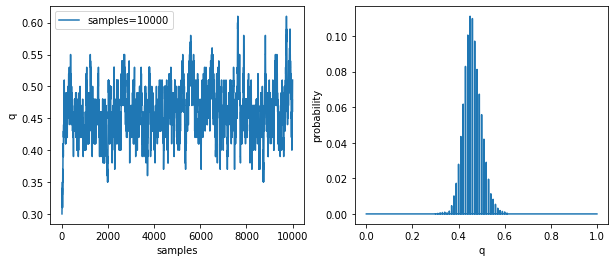

In [23]:
# モンテカルロステップ数 10000
q_10000, ｌ_10000 = mcmc_metropolis(data, 0.3, 10000)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.plot(np.arange(len(q_10000)), q_10000, label='samples=10000')
ax1.legend()
ax1.set_xlabel('samples')
ax1.set_ylabel('q')

count, value = np.histogram(q_10000, bins=10000, range=(0.00, 1.00))
ax2.step(value[:-1], count/10000)
ax2.set_xlabel('q')
ax2.set_ylabel('probability')

plt.show()

In [24]:
q_01, _ = mcmc_metropolis(data, 0.1, 500)
q_02, _ = mcmc_metropolis(data, 0.2, 500)
q_03, _ = mcmc_metropolis(data, 0.3, 500)
q_04, _ = mcmc_metropolis(data, 0.4, 500)
q_05, _ = mcmc_metropolis(data, 0.5, 500)
q_06, _ = mcmc_metropolis(data, 0.6, 500)
q_07, _ = mcmc_metropolis(data, 0.7, 500)
q_08, _ = mcmc_metropolis(data, 0.8, 500)
q_09, _ = mcmc_metropolis(data, 0.9, 500)

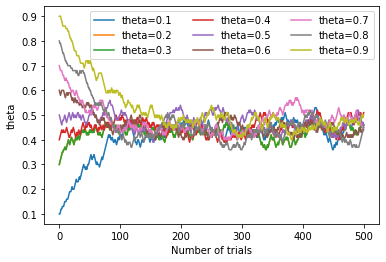

In [25]:
plt.plot(np.arange(len(q_01)), q_01, label='theta=0.1')
plt.plot(np.arange(len(q_02)), q_03, label='theta=0.2')
plt.plot(np.arange(len(q_03)), q_03, label='theta=0.3')
plt.plot(np.arange(len(q_04)), q_04, label='theta=0.4')
plt.plot(np.arange(len(q_05)), q_05, label='theta=0.5')
plt.plot(np.arange(len(q_06)), q_06, label='theta=0.6')
plt.plot(np.arange(len(q_07)), q_07, label='theta=0.7')
plt.plot(np.arange(len(q_08)), q_08, label='theta=0.8')
plt.plot(np.arange(len(q_09)), q_09, label='theta=0.9')

plt.legend(ncol=3)
plt.xlabel('Number of trials')
plt.ylabel('theta')
plt.show()